Text Mining & Image Recognition  
Ramiro Wong  
23000952  

### Laboratorio 1: Introducción al Procesamiento de Imágenes

In [2]:
# cargamos librerías 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("imagen_ejemplo.jpg") # carga de imagen ejemplo
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convertir imagen a formato RGB

#### Problema 1

In [4]:
def canales_color(img, input_entero):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_salida = np.zeros_like(img) #  lienzo para imagen de salida

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            
            # creacion de condicionales para cada entero ingresado
            if input_entero == 1:
                img_salida[i,j] = [0, 0, blue]
            
            if input_entero == 2:
                img_salida[i,j] = [0, green, 0]

            if input_entero == 3:
                img_salida[i,j] = [red, 0, 0]
            
            if input_entero == 10:
                img_salida[i,j] = [red, green, 0]

            if input_entero == 20:
                img_salida[i,j] = [0, green, blue]
            
            if input_entero == 30:
                img_salida[i,j] = [red, 0, blue]

    return img_salida #función devuelve imagen de salia                  

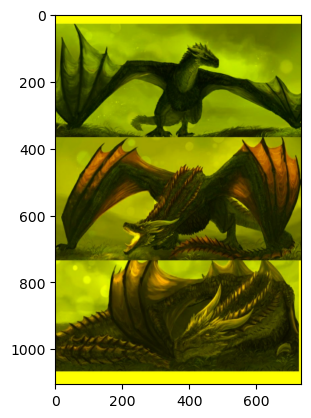

In [5]:
# probando funcion
prueba_1 = canales_color(img, 10)
cv2.imwrite("prueba10.jpg", prueba_1) 

prueba_1_import = cv2.imread("prueba10.jpg", cv2.IMREAD_COLOR)
plt.imshow(prueba_1_import)
plt.show()

#### Problema 2

In [17]:
def reconstruccion_gris(img_rojo, img_azul, img_verde):
    alto = img_rojo.shape[0]
    ancho = img_rojo.shape[1]

    img_salida = np.zeros_like(img_rojo) #  lienzo para imagen de salida

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel_rojo = img_azul[i, j]
            pixel_verde = img_azul[i, j]
            pixel_azul = img_azul[i, j]

            red = pixel_rojo[0]
            green = pixel_verde[1]
            blue = pixel_azul[2]
        
            img_salida[i,j] = [red, green, blue]
    
    return img_salida

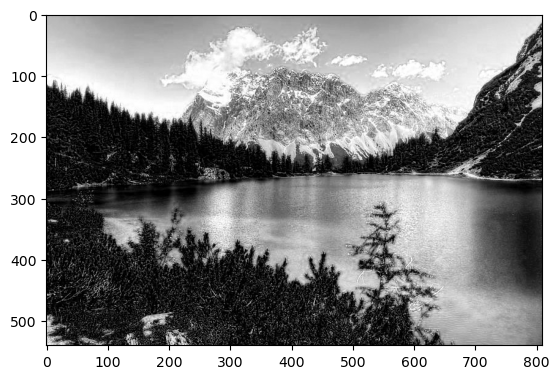

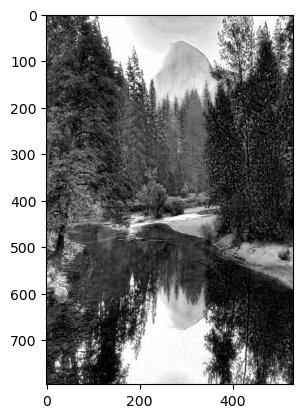

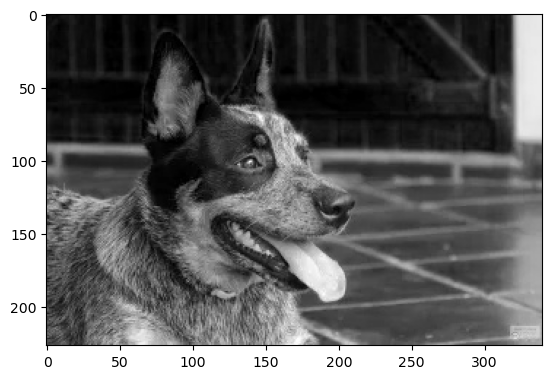

In [46]:
img_rojo_1 =  cv2.imread("imagen1\imagen1_salida_gray_rojo.jpg")
img_azul_1 =  cv2.imread("imagen1\imagen1_salida_gray_azul.jpg")
img_verde_1 =  cv2.imread("imagen1\imagen1_salida_gray_verde.jpg")

imagen_1 = reconstruccion_gris(img_rojo_1, img_azul_1, img_verde_1)
plt.imshow(imagen_1)
plt.show()

img_rojo_2 =  cv2.imread("imagen2\imagen2_salida_gray_rojo.jpg")
img_azul_2 =  cv2.imread("imagen2\imagen2_salida_gray_azul.jpg")
img_verde_2 =  cv2.imread("imagen2\imagen2_salida_gray_verde.jpg")

imagen_2 = reconstruccion_gris(img_rojo_2, img_azul_2, img_verde_2)
plt.imshow(imagen_2)
plt.show()

img_rojo_perro =  cv2.imread("perro\perro_salida_gray_rojo.jpg")
img_azul_perro =  cv2.imread("perro\perro_salida_gray_azul.jpg")
img_verde_perro =  cv2.imread("perro\perro_salida_gray_verde.jpg")

imagen_perro = reconstruccion_gris(img_rojo_perro, img_azul_perro, img_verde_perro)
plt.imshow(imagen_perro)
plt.show()

#### Problema 3

In [50]:
def escala_grises(img_color):
    alto = img_color.shape[0]
    ancho = img_color.shape[1]

    img_salida_rojo = np.zeros((alto, ancho), dtype=img_color.dtype)
    img_salida_verde = np.zeros((alto, ancho), dtype=img_color.dtype)
    img_salida_azul = np.zeros((alto, ancho), dtype=img_color.dtype)

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img_color[i, j]

            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
        
            img_salida_rojo[i, j] = red
            img_salida_verde[i, j] = green
            img_salida_azul[i, j] = blue
    
    return img_salida_rojo, img_salida_azul, img_salida_verde

In [39]:
img_color = cv2.imread('imagen_ejemplo.jpg')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

In [51]:
img_salida_rojo, img_salida_azul, img_salida_verde = escala_grises(img_color)

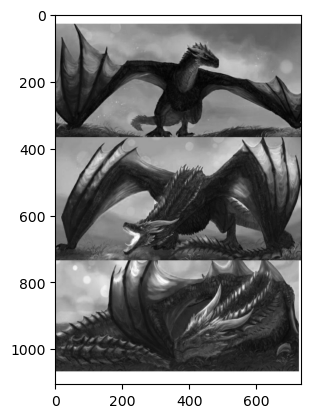

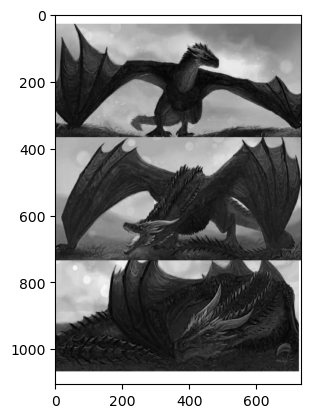

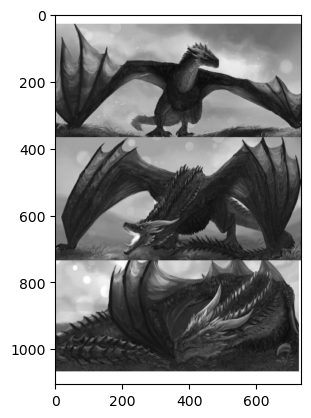

In [53]:
plt.imshow(img_salida_rojo, cmap="gray")
plt.show()

plt.imshow(img_salida_azul, cmap="gray")
plt.show()

plt.imshow(img_salida_verde, cmap="gray")
plt.show()

#### Problema 4

In [58]:
def histogramas_canales_gris(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_rojo = np.zeros_like(img)
    img_verde = np.zeros_like(img)
    img_azul = np.zeros_like(img)

    # ciclo para generar canales de color
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
    
            img_rojo[i,j] = [red, 0, 0]
            img_azul[i,j] = [0, 0, blue]
            img_verde[i,j] = [0, green, 0]
    
    # calculo de histogramas con imagenes por canal de color separadas
    hist_rojo = cv2.calcHist([img_rojo], [0], None, [256], [0, 256])
    hist_verde = cv2.calcHist([img_verde], [1], None, [256], [0, 256])
    hist_azul = cv2.calcHist([img_azul], [2], None, [256], [0, 256])

    #Visualización de histogramas calculados
    plt.figure(figsize=(12, 6))

    # Histograma para el canal rojo
    plt.subplot(1, 3, 1)
    plt.plot(hist_rojo, color='red')
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Cantidad de Pixeles")
    plt.title("Histograma - Canal Rojo")

    # Histograma para el canal verde
    plt.subplot(1, 3, 2)
    plt.plot(hist_verde, color='green')
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Cantidad de Pixeles")
    plt.title("Histograma - Canal Verde")

    # Histograma para el canal azul
    plt.subplot(1, 3, 3)
    plt.plot(hist_azul, color='blue')
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Cantidad de Pixeles")
    plt.title("Histograma - Canal Azul")

    plt.show()
    

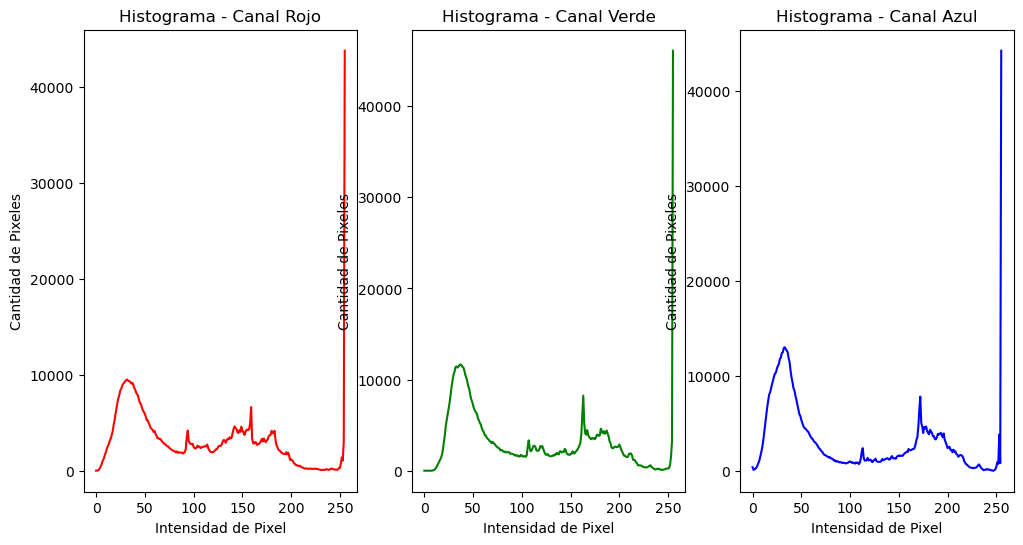

In [59]:
histogramas_canales_gris(img)

#### Problema 5

In [61]:
def gris_ponderado(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_gris_ponderado = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            img_gris_ponderado[i, j] = (0.3*red + 0.59*green + 0.11*blue) # escala de grises ponderada
    
    return img_gris_ponderado

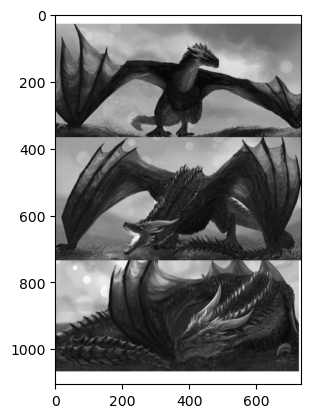

In [63]:
img_gris_ponderado = gris_ponderado(img)
plt.imshow(img_gris_ponderado, cmap="gray")
plt.show()

#### Problema 6

En el modelo de color HSV, un color se define por su tono (H), su saturación (S) y su luminosidad (V), por lo que se parece más a la percepción del color humano que a los modelos de color aditivos y sustractivos. Es fácil ajustar un color por su saturación y brillo.

El tono (H) se da como un ángulo en el círculo cromático, por lo tanto, puede alcanzar valores entre 0° y 360°. 0° corresponde al color rojo, 120° corresponde al color verde y 240° corresponde al color azul. La saturación (S) se declara como porcentajes y, por lo tanto, puede alcanzar valores entre 0% y 100% (o 0 a 1). Una saturación del 100% significa un color completamente saturado y puro, cuanto menor es la saturación, más se vuelve el color a un gris neutro. El valor de luminosidad o negrura (V) también se da como un porcentaje, donde 0% significa que no hay brillo (por lo tanto, negro) y 100% de brillo total, por lo tanto, un espectro entre el color puro (saturación del 100%) y el blanco (saturación de 0 %)

Si ambos, la saturación y la luminosidad son 100%, se obtiene un color puro. Si la saturación es 0% y la luminosidad es 100%, es blanca y para todos los casos en que la luminosidad es 0%, es negra. Estas relaciones pueden ser fácilmente parecidas probando en la programa Pipette. En esta aplicación es posible establecer el tono, la saturación y el valor de luz más alto o más bajo y ver el efecto directo sobre el color resultante.

